<a href="https://colab.research.google.com/github/SURESHBEEKHANI/FCN-_neural_Network/blob/main/FCN%20_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the TensorFlow library, which is used for building and training neural networks.
import tensorflow as tf

# Import specific tools from Keras (which is a part of TensorFlow) that help in building and structuring neural networks.
from tensorflow.keras import models, layers

# Import the Matplotlib library for creating graphs and charts to visualize data.
import matplotlib.pyplot as plt

# Import the Sequential model type from Keras, which allows us to build neural networks layer by layer.
from tensorflow.keras.models import Sequential

# Import the Dense layer type from Keras, which is a type of neural network layer where every node is connected to every node in the next layer.
from tensorflow.keras.layers import Dense

# Import a utility function from Keras that helps convert labels into a specific format needed for training neural networks.
from tensorflow.keras.utils import to_categorical

# Import the NumPy library to create dummy data for training the neural networks.
import numpy as n

In [ ]:

# Load the Buliten data Fashion MNIST dataset from TensorFlow
fashion_mnist = tf.keras.datasets.fashion_mnist


In [ ]:

# Step 2: Load the Fashion MNIST dataset
# The dataset is automatically split into training and testing sets X is Features  Y is Traget Vraible
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

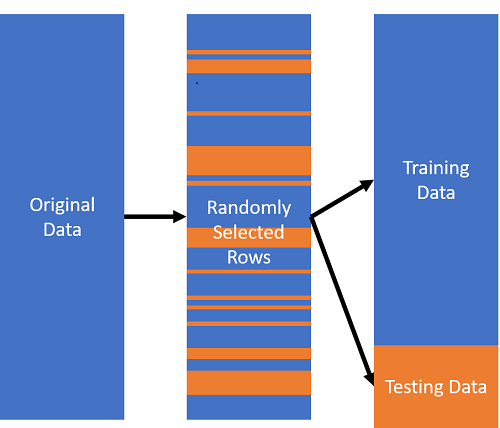

In [ ]:
# Print Shape of Train Dataset
# X_train represents the features or images
print("Shape of X_train (features/images):", X_train.shape)

# Y_train represents the labels or target variables
print("Shape of Y_train (labels/target variables):", Y_train.shape)


In [ ]:
# Print the Shape of the Train Dataset
# X_test contains the features or images.
print("Shape of X_Test (features/images):", X_test.shape)

# Y_Test contains the labels or target variables.
print("Shape of Y_Test (labels/target variables):", Y_test.shape)



In [ ]:
#pick 10 random img from dataset and Disply
# Importing the matplotlib library to help us display images
import matplotlib.pyplot as plt

# Define the  Number of images we want to display
n = 10

# Creating a big area to show the images
plt.figure(figsize=(20, 4))

# Looping through the first 'n' images
for i in range(n):
    # Adding a small area inside the big area to show each image
    ax = plt.subplot(2, n, i + 1)

    # Displaying each image, making sure it fits in a 28 by 28 square
    plt.imshow(X_train[i].reshape(28, 28))

    # Making the images black and white
    plt.gray()

    # Hiding the number labels around the images
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Showing the big area with all the images
plt.show()

# Closing the big area after showing the images
plt.close()

#This data set Single channels  img  and 3 single

In [ ]:
# Flattening the Images
# Convert image multidimensional array to one-dimensional array
# Converting a 2D matrix to a 1D matrix Img train and Test data
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)



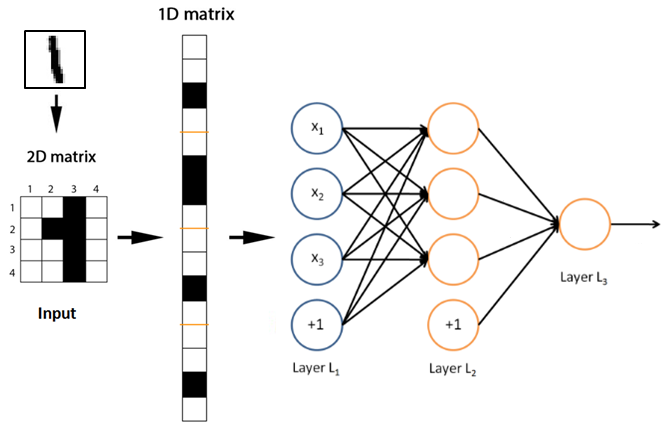

In [ ]:
 #Print the Shape of the Train Dataset in 1D Matrix
# X_train contains the features or images in a 1D matrix.
print("Shape of X_train (features/images in 1D matrix):", X_train.shape)

# X_test contains the features or images in a 1D matrix.
print("Shape of X_test (features/images in 1D matrix):", X_test.shape)

In [ ]:
# Convert the data type of img to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [ ]:
# Normalize or Min mix Scallling the pixel values of the image to range between 0 and 1, where 0 represents black and 1 represents white
# Divide by 255 to scale the pixel values
X_train /= 255
X_test /= 255


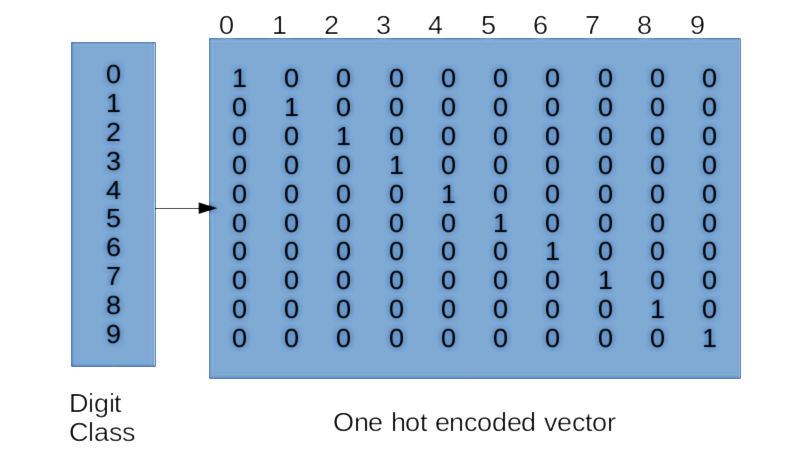

In [ ]:
# Processing the Target Variable

# Number of classes in the dataset
classes = 10

# Convert labels into one-hot encoding
Y_train = to_categorical(Y_train, classes)
Y_test = to_categorical(Y_test, classes)



In [ ]:
# Printing the shapes of new training data

print("New X train Shape:{} \n New Y train shape :{}".format(X_train.shape,Y_train.shape))


In [ ]:
# Set the hyperparameters of the model

# Define the input size (number of pixels in each image)
input_size = 784  # Note: The typical size for an image with 28x28 pixels is 784

# Specify the number of data samples processed in each batch
batch_size = 5

# Define the number of neurons in the first layer
hidden1 = 200

# Define the number of neurons in the second layer
hidden2 = 100

# Define the total number of classes in the categorical dataset
# Define the number of neurons in the second layer

classes = 10

# Define the number of epochs (iterations over the entire dataset)
epochs = 10

# Build Fully Connected Neural Network (FCN) using a popular deep learning library like Keras

In [ ]:
# Build the model sequentially, layer by layer
model = Sequential()

# Add the first hidden layer with 'hidden1' neurons using the ReLU activation function
# 'input_dim' specifies the number of inputs to the layer
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))

# Add the second hidden layer with 'hidden2' neurons using the ReLU activation function
model.add(Dense(hidden2, activation='relu'))

# Add the output layer with 'classes' neurons using the softmax activation function
model.add(Dense(classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

# Print the model summary
model.summary()


In [ ]:
from time import time

# Assuming the data is already preprocessed and split into training and testing sets (X_train, Y_train, X_test, Y_test)

# Start timing the training process
tic = time()

# Train the model
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

# Stop timing the training process
toc = time()

# Print the time taken to train the model
print("Model training took {:.2f} seconds".format(toc - tic))



In [ ]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test set using the trained model
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, Y_test)
print("\nTest accuracy: {}".format(test_accuracy))

In [ ]:
# Define a mask for selecting a range of indices (20 to 49)
mask = range(20, 50)

# Select the first 20 samples from the test set for visualization
X_valid = X_test[0:20]
actual_labels = Y_test[0:20]

# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)


In [ ]:
# Set up a figure to display images
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()
